# Problem Statement

Wine Quality Prediction-
Here, we will apply a method of assessing wine quality using a decision tree, and test it against the wine-quality dataset from the UC Irvine Machine Learning Repository.



The wine dataset is a classic and very easy multi-class classification dataset.
Find more about data here - https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

In [237]:
#Import all the necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import stats,shapiro
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,AdaBoostClassifier,AdaBoostRegressor
from sklearn.ensemble import BaggingClassifier,BaggingRegressor,GradientBoostingClassifier,GradientBoostingRegressor,VotingClassifier

# Q1. Load the Wine Data file into Python DataFrame. 


Let us assume the data frame is named wine_df


In [3]:
wine_df=pd.read_csv('winequality-red.csv')
wine_df.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset.

# Q2. Print 10 samples from the dataset

In [14]:
wine_df.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


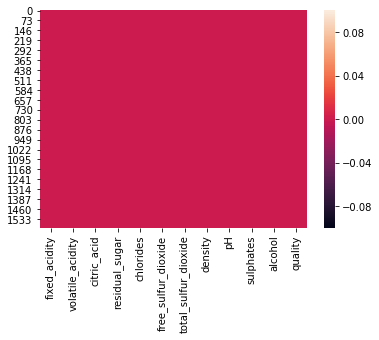

In [31]:
sns.heatmap(wine_df.isnull())

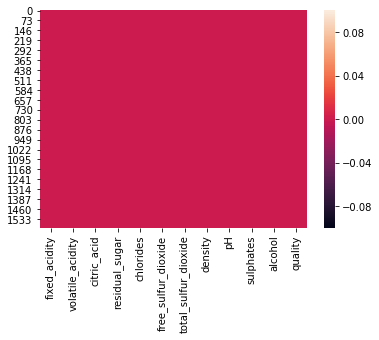

In [32]:
sns.heatmap(wine_df.isna())

# Q3 Print the datatypes of each column and the shape of the dataset 

In [5]:
wine_df.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
wine_df.shape

(1599, 12)

In [128]:
##Creating another column quality1 which is a boolean value symbolizing good(1)(if quality>6.5) and bad(0)(if quality<6.5)

counter = 0;
quality1 = pd.Series()
for value in wine_df.quality:
    if value > 6.5 :
        quality1.set_value(counter, 1)
    else:
        quality1.set_value(counter, 0)
    counter=counter+1

/Users/sesankaran/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
/Users/sesankaran/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """


TypeError: 'tuple' object is not callable

In [147]:
print(quality1.shape)
print(wine_df['quality'].value_counts())
print(quality1.value_counts())
wine_df['quality1'] = quality1
print(wine_df.quality.unique())
print(wine_df.quality1.unique())

(1599,)
5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64
0    1382
1     217
dtype: int64
[5 6 7 4 8 3]
[0 1]


# Q4 Print the descriptive statistics of each & every column using describe() function

In [148]:
wine_df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality1
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.000000


# Q5 Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes).

In [ ]:
##Shapiro test suggest that With 95% probability, all the columns do not follow normal distribution

## Though the plot of density and pH columns suggest follows normal distribution, box plot suggest that there are lot of outliers for these 
## 2 columns. Skewness and kurtosis also suggest the same

## p-value for shapiro test for residual_sugar and chlorides are 0

In [149]:
for column in wine_df.columns:
    print('kurtosis of ',column, ' is ',stats.kurtosis(wine_df[column]))
    print('skewness of ', column, ' is ',stats.skew(wine_df[column]))
    print('shapiro test for ',column,' is ',shapiro(wine_df[column]))


kurtosis of  fixed_acidity  is  1.1248563352037486
skewness of  fixed_acidity  is  0.9818292953262073
shapiro test for  fixed_acidity  is  (0.942030668258667, 1.5255951637239901e-24)
kurtosis of  volatile_acidity  is  1.2179633893005306
skewness of  volatile_acidity  is  0.6709623963499574
shapiro test for  volatile_acidity  is  (0.9743340611457825, 2.686806772838566e-16)
kurtosis of  citric_acid  is  -0.7902825153036646
skewness of  citric_acid  is  0.3180385895475358
shapiro test for  citric_acid  is  (0.9552900195121765, 1.0208196357632134e-21)
kurtosis of  residual_sugar  is  28.524437824252235
skewness of  residual_sugar  is  4.536394788805638
shapiro test for  residual_sugar  is  (0.5660765171051025, 0.0)
kurtosis of  chlorides  is  41.58170804367577
skewness of  chlorides  is  5.675016527504257
shapiro test for  chlorides  is  (0.4842468500137329, 0.0)
kurtosis of  free_sulfur_dioxide  is  2.01348999733378
skewness of  free_sulfur_dioxide  is  1.249393847434253
shapiro test for 

28.524437824252235
4.536394788805638


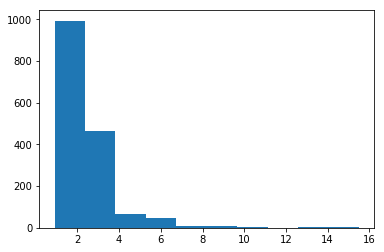

In [82]:
plt.hist(wine_df['residual_sugar'])
print(stats.kurtosis(wine_df['residual_sugar']))
print(stats.skew(wine_df['residual_sugar']))

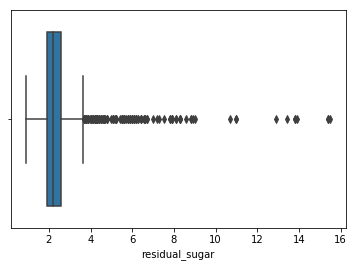

In [84]:
sns.boxplot(wine_df['residual_sugar'])

41.58170804367577
5.675016527504257


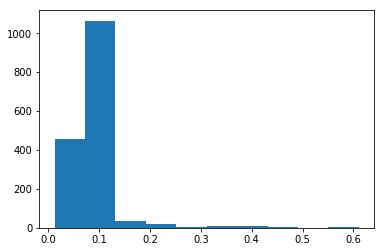

In [83]:
plt.hist(wine_df['chlorides'])
print(stats.kurtosis(wine_df['chlorides']))
print(stats.skew(wine_df['chlorides']))

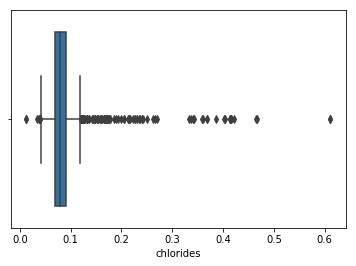

In [85]:
sns.boxplot(wine_df['chlorides'])

(array([  8.,  27.,  90., 250., 487., 448., 185.,  74.,  19.,  11.]),
 array([0.99007 , 0.991432, 0.992794, 0.994156, 0.995518, 0.99688 ,
        0.998242, 0.999604, 1.000966, 1.002328, 1.00369 ]),
 <a list of 10 Patch objects>)

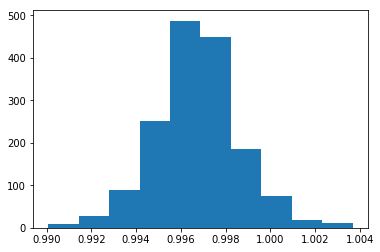

In [60]:
plt.hist(wine_df['density'])

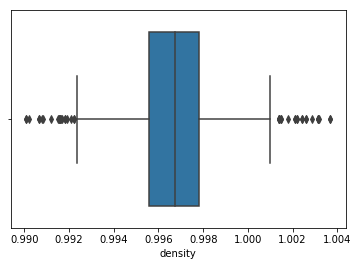

In [78]:
sns.boxplot(wine_df['density'])

In [79]:
stats.kurtosis(wine_df['density'])

0.9274107990478297

(array([  2.,  27., 134., 361., 555., 352., 132.,  29.,   3.,   4.]),
 array([2.74 , 2.867, 2.994, 3.121, 3.248, 3.375, 3.502, 3.629, 3.756,
        3.883, 4.01 ]),
 <a list of 10 Patch objects>)

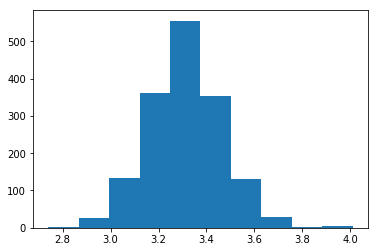

In [61]:
plt.hist(wine_df['pH'])

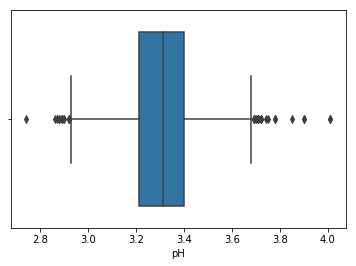

In [80]:
sns.boxplot(wine_df['pH'])

In [81]:
stats.kurtosis(wine_df['pH'])

0.8006714441211544

# Q6. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


In [150]:
wine_df.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality1
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052,0.120061
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558,-0.270712
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373,0.214716
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732,0.047779
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907,-0.097308
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656,-0.071747
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100,-0.139517
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919,-0.150460
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731,-0.057283
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397,0.199485


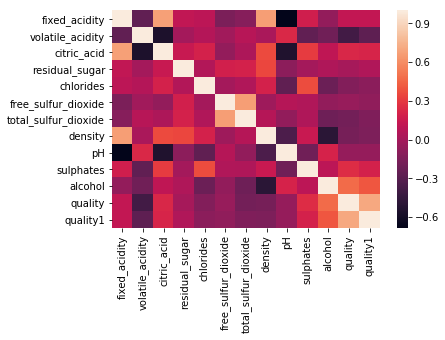

In [151]:
sns.heatmap(wine_df.corr())

In [ ]:
## Quality (Regression)

## As we can see from the corr above and pairplot below, all columns can be included for decision trees. But none of these columns have unique
## impact on different quality values. Morover, the independant variables are not normally distributed with many outliers

## Quality1 (Categorical)

## As we can see from the corr above and pairplot below, all columns can be included for decision trees. But none of these columns have unique
## impact on good and bad categorical quality value. The independant variables are not normally distributed

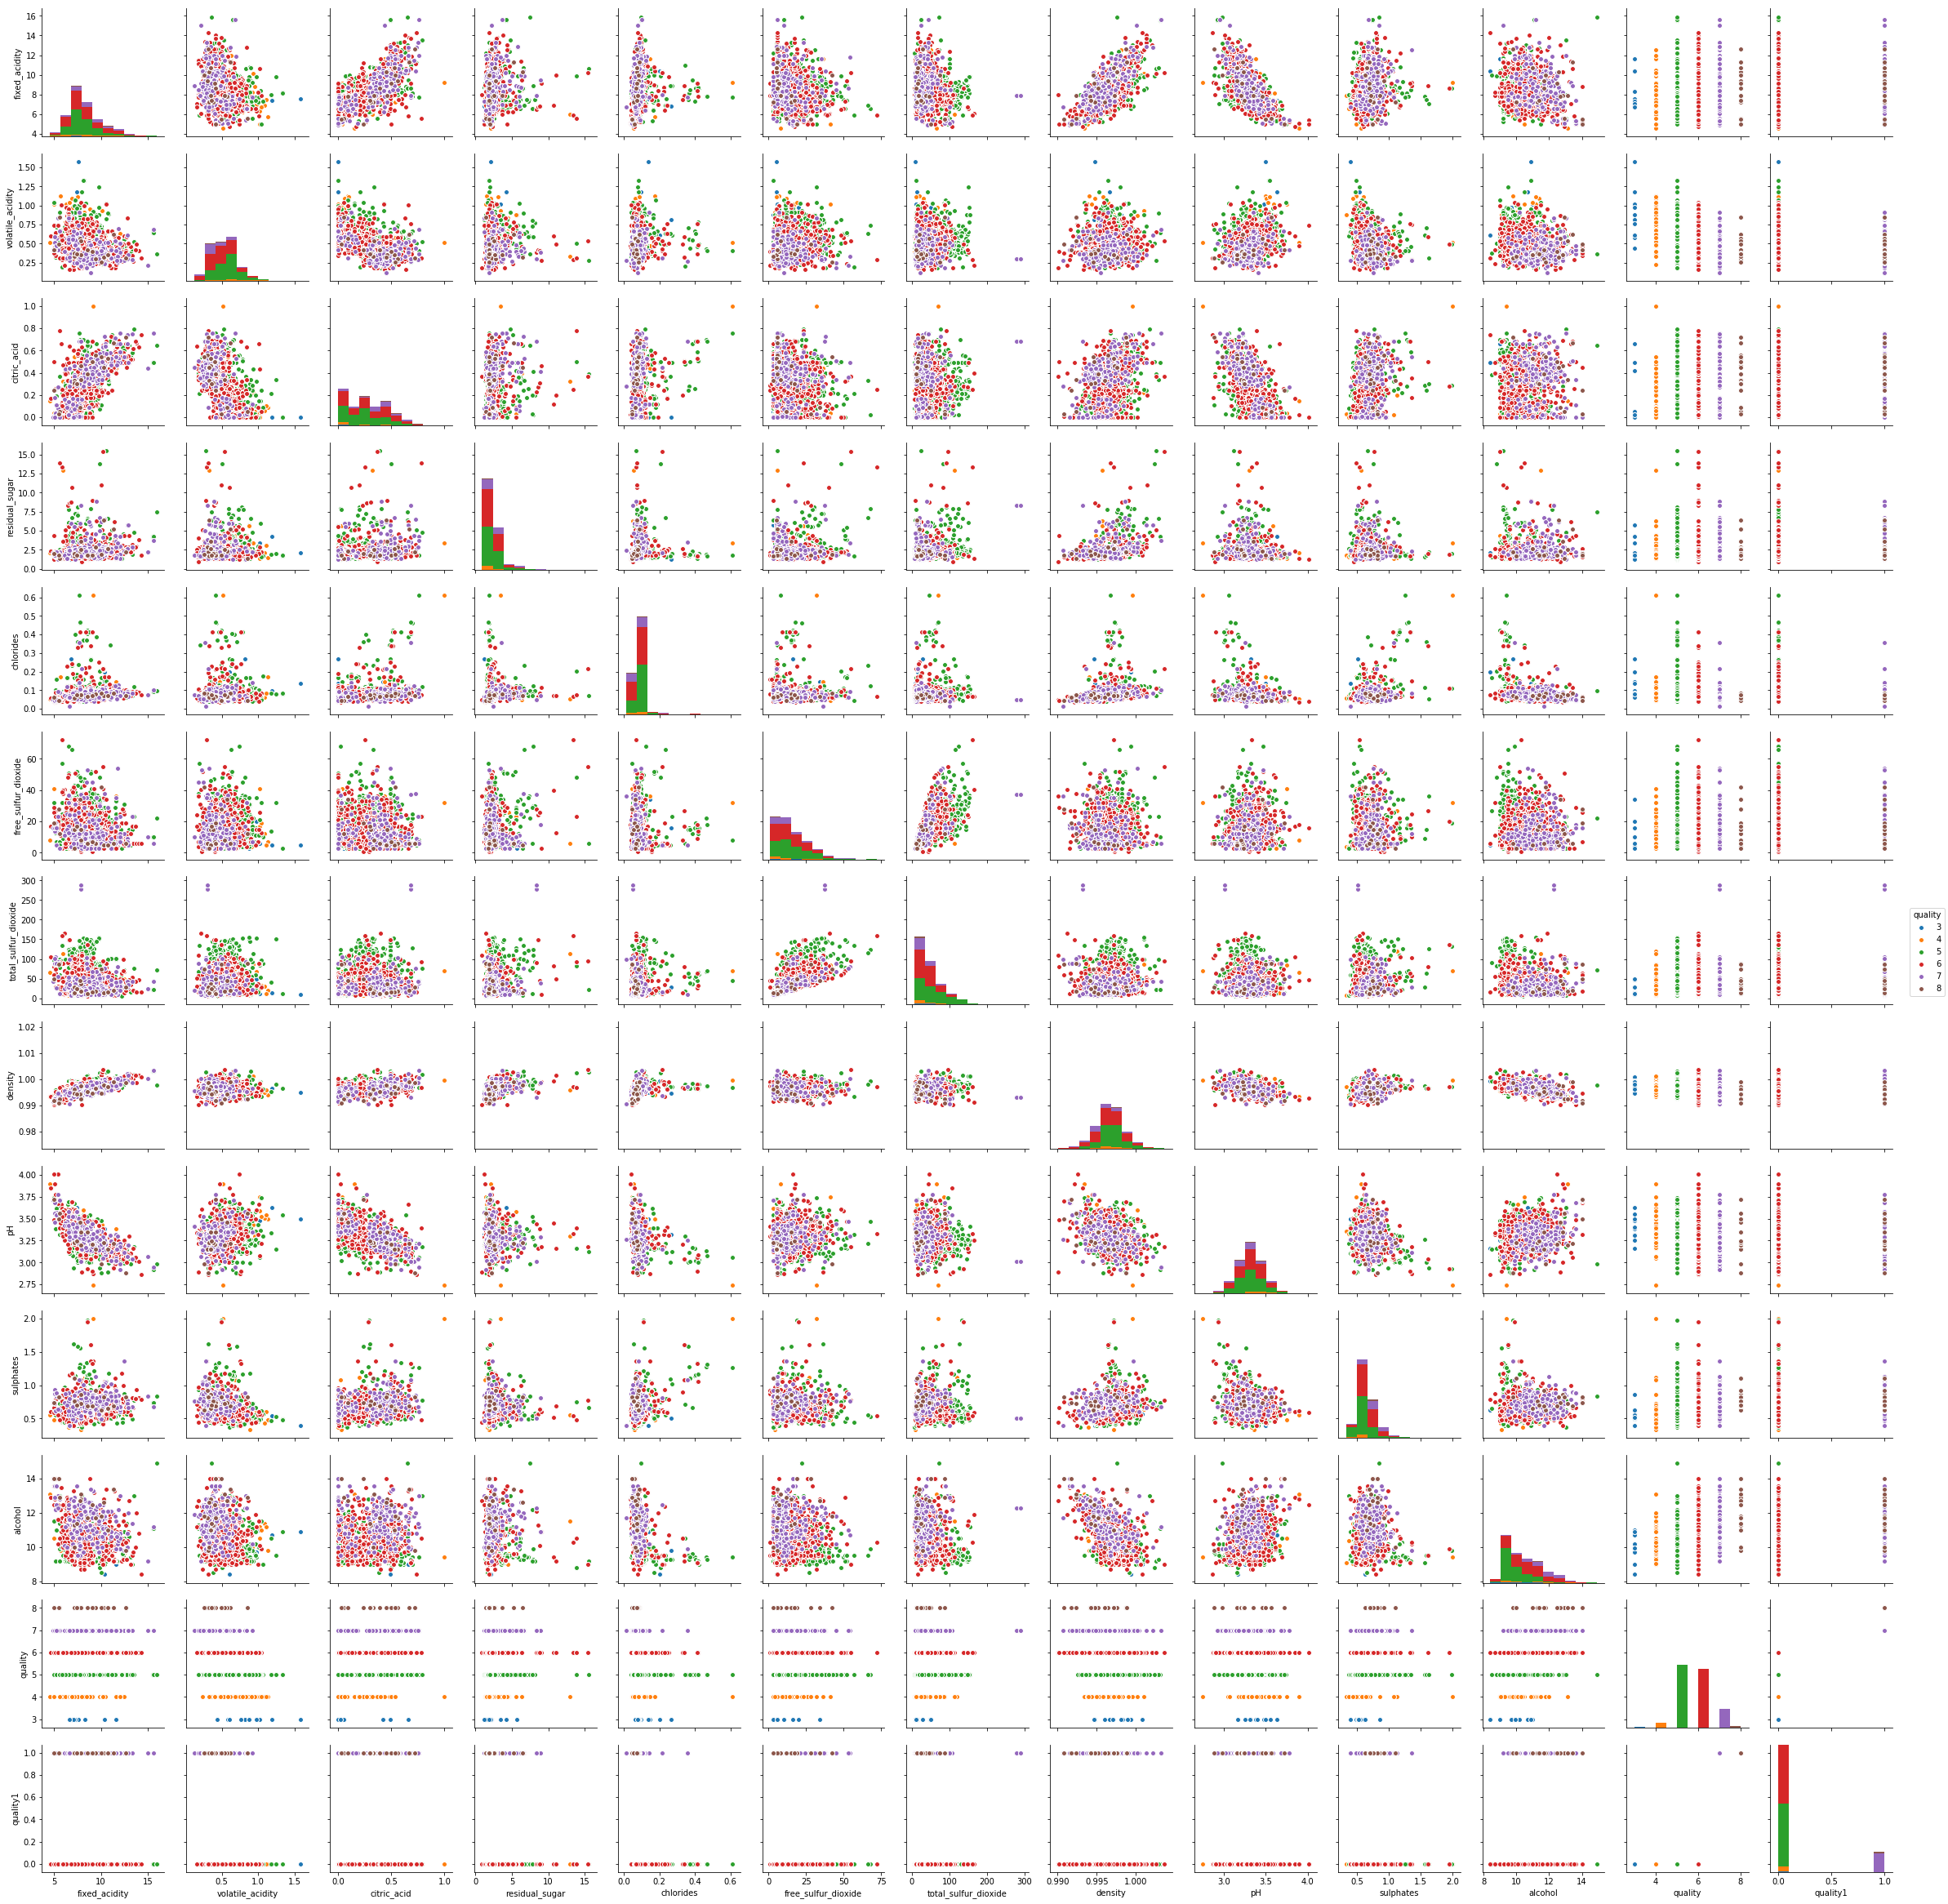

In [146]:
sns.pairplot(wine_df,hue='quality')

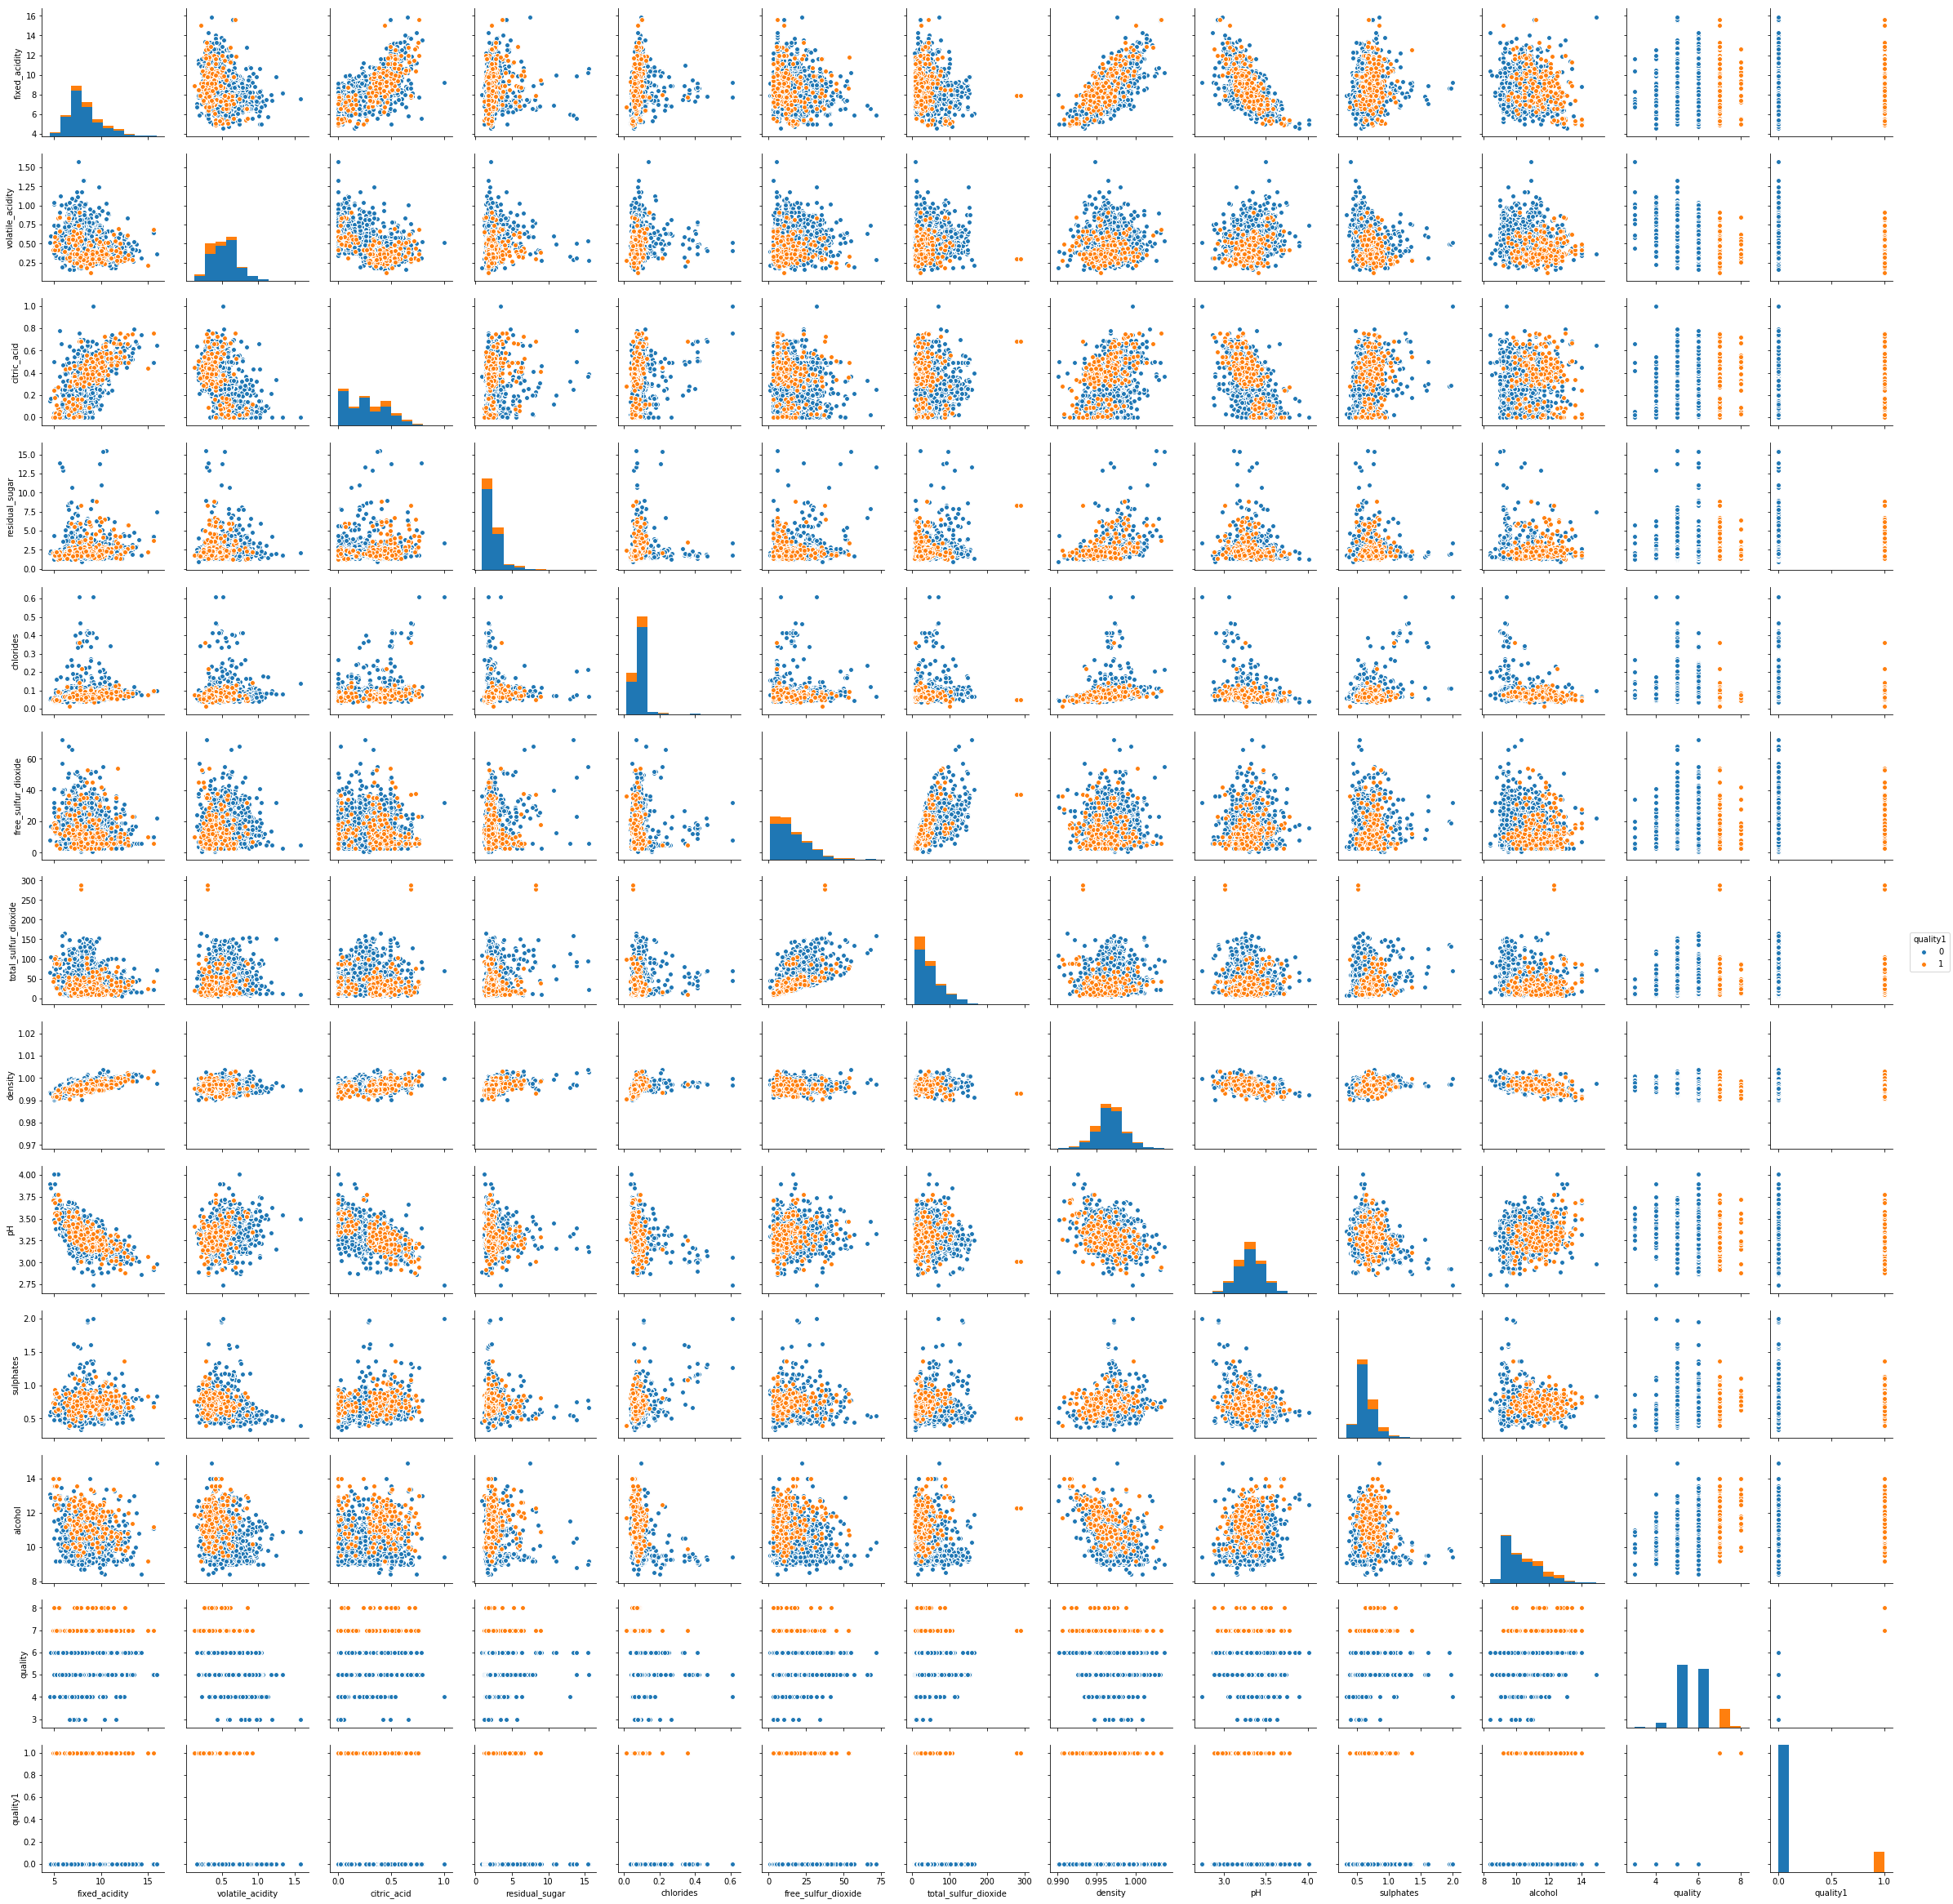

In [143]:
sns.pairplot(wine_df,hue='quality1')

# Q7 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test) based on dependent and independent variables.



In [156]:
## Analysis is done for both regression and categorical, hence 2 different training and test sets are prepared

## Regression Values
X = wine_df[['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide',
            'density','pH','sulphates','alcohol']]
Y = wine_df['quality']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=100)
print('X_train.shape - ',X_train.shape,' X_test.shape - ',X_test.shape,' Y_train.shape - ',Y_train.shape,' Y_test.shape - ',Y_test.shape)

## Categorical values
X_cat = wine_df[['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide',
            'density','pH','sulphates','alcohol']]
Y_cat = wine_df['quality1']
X_cat_train,X_cat_test,Y_cat_train,Y_cat_test = train_test_split(X_cat,Y_cat,test_size=0.3,random_state=100)

print('X_cat_train.shape - ',X_cat_train.shape,' X_cat_test.shape - ',X_cat_test.shape,' Y_cat_train.shape - ',Y_cat_train.shape,' Y_cat_test.shape - ',Y_cat_test.shape)


X_train.shape -  (1119, 11)  X_test.shape -  (480, 11)  Y_train.shape -  (1119,)  Y_test.shape -  (480,)
X_cat_train.shape -  (1119, 11)  X_cat_test.shape -  (480, 11)  Y_cat_train.shape -  (1119,)  Y_cat_test.shape -  (480,)


# Q8 Create the decision tree model using “entropy” method of finding the split columns and fit it to training data.




In [158]:
dtr = DecisionTreeRegressor()
dtc = DecisionTreeClassifier(criterion='entropy')

In [159]:
dtr.fit(X_train,Y_train)
dtc.fit(X_cat_train,Y_cat_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Q9 Print the accuracy of the model & print the confusion matrix 

<h3>Regression Model</h3>

dtr score for regression data (train) is  1.0
dtr score for regression data (test) is  -0.021207177814029254
feature importance -  Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality1'],
      dtype='object') [0.0454896  0.12333916 0.04615074 0.06433434 0.07907157 0.0292332
 0.08522771 0.05577141 0.05457743 0.1550309  0.26177394]


/Users/sesankaran/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/sesankaran/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


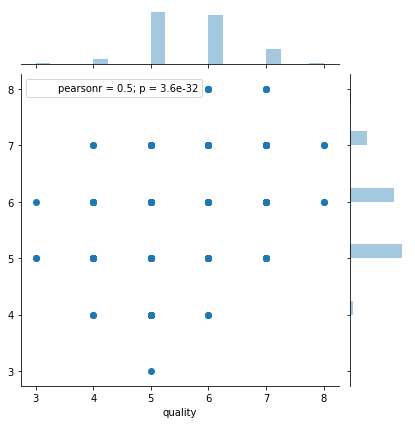

In [188]:
print('dtr score for regression data (train) is ',dtr.score(X_train,Y_train))
print('dtr score for regression data (test) is ',dtr.score(X_test,Y_test))
print('feature importance - ',wine_df.columns,dtr.feature_importances_)
Y_pred = dtr.predict(X_test)
sns.jointplot(Y_test,Y_pred)

In [195]:
from IPython.display import Image  
from sklearn import tree
from os import system

train_char_label = ['3', '4','5','6','7','8']

Good_Bad_Wine_Reg_File = open('good_bad_wine_reg.dot','w')
dot_data = tree.export_graphviz(dtr, out_file=Good_Bad_Wine_Reg_File, feature_names = list(X_train), class_names = list(train_char_label))

Good_Bad_Wine_Reg_File.close()

# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dtr.feature_importances_, columns = ["Imp"], index = X_train.columns))


                           Imp
fixed_acidity         0.045490
volatile_acidity      0.123339
citric_acid           0.046151
residual_sugar        0.064334
chlorides             0.079072
free_sulfur_dioxide   0.029233
total_sulfur_dioxide  0.085228
density               0.055771
pH                    0.054577
sulphates             0.155031
alcohol               0.261774


In [196]:
metrics.confusion_matrix(Y_test,Y_pred)

array([[  0,   0,   2,   1,   0,   0],
       [  0,   2,   8,   5,   2,   0],
       [  1,   9, 134,  54,   6,   0],
       [  0,   2,  60, 101,  26,   4],
       [  0,   0,   5,  16,  35,   3],
       [  0,   0,   0,   2,   2,   0]])

<h3>Categorical Model</h3>

dtc score for categorical quality(test) is  0.8583333333333333
dtc score for categorical quality(train) is  1.0


/Users/sesankaran/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/sesankaran/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


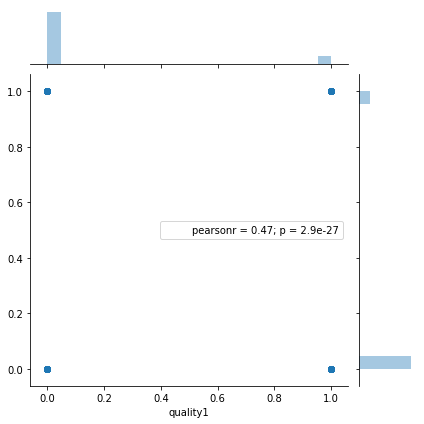

In [189]:
print('dtc score for categorical quality(test) is ',dtc.score(X_cat_test, Y_cat_test))
print('dtc score for categorical quality(train) is ',dtc.score(X_cat_train, Y_cat_train))
Y_cat_pred = dtc.predict(X_cat_test)
sns.jointplot(Y_cat_test,Y_cat_pred)

In [190]:
from IPython.display import Image  
from sklearn import tree
from os import system

train_char_label = ['Bad', 'Good']

Good_Bad_Wine_File = open('good_bad_wine.dot','w')
dot_data = tree.export_graphviz(dtc, out_file=Good_Bad_Wine_File, feature_names = list(X_cat_train), class_names = list(train_char_label))

Good_Bad_Wine_File.close()

# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dtc.feature_importances_, columns = ["Imp"], index = X_cat_train.columns))


                           Imp
fixed_acidity         0.054696
volatile_acidity      0.106680
citric_acid           0.005287
residual_sugar        0.062726
chlorides             0.077260
free_sulfur_dioxide   0.032297
total_sulfur_dioxide  0.110327
density               0.076301
pH                    0.088969
sulphates             0.126197
alcohol               0.259261


In [194]:
metrics.confusion_matrix(Y_cat_test,Y_cat_pred)

array([[372,  45],
       [ 23,  40]])

# Q10. Regularize the decision tree by limiting the max. depth of trees and print the accuracy.

In [234]:
dtr5 = DecisionTreeRegressor(max_depth=5)#4-02186 #5-0.2322 #6-0.223 #7-0.180 
dtc8 = DecisionTreeClassifier(criterion='entropy',max_depth=8)#4-0.8541 #5-0.8604 #6-0.847 #7-0.8625 #8-0.88125 #9-0.875
dtr5.fit(X_train, Y_train)
dtc8.fit(X_cat_train,Y_cat_train)
print('DecisionTreeRegressor score with test data',dtr5.score(X_test,Y_test))
print('DecisionTreeRegressor score with train data',dtr5.score(X_train,Y_train))
print('DecisionTreeClassifier score with test data',dtc8.score(X_cat_test,Y_cat_test))
print('DecisionTreeClassifier score with train data',dtc8.score(X_cat_train,Y_cat_train))

DecisionTreeRegressor score with test data 0.22243717326549917
DecisionTreeRegressor score with train data 0.5182497464498979
DecisionTreeClassifier score with test data 0.86875
DecisionTreeClassifier score with train data 0.9767649687220733


# Q11 Apply the Random forest model and print the accuracy of Random forest Model

RandomForestRegressor score with test data 0.43387960848287127
RandomForestRegressor score with train data 0.9249550460688409
RandomForestClassifier score with test data 0.9104166666666667
RandomForestClassifier score with train data 1.0


/Users/sesankaran/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/sesankaran/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/sesankaran/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/sesankaran/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


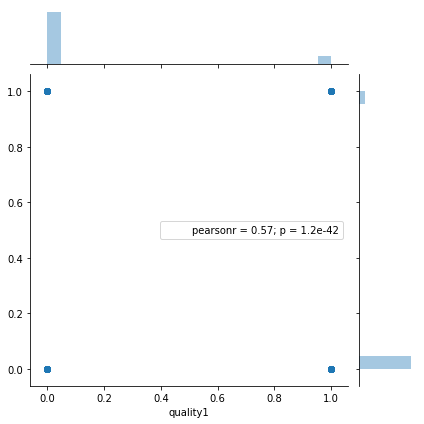

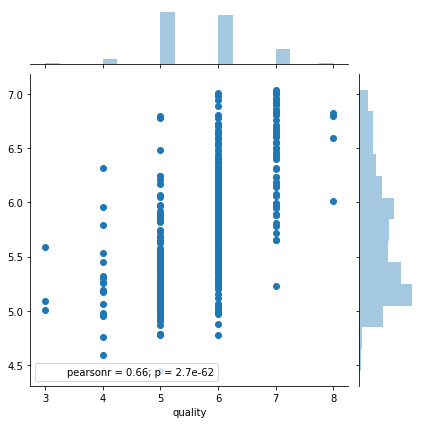

In [217]:
rfc = RandomForestClassifier(n_estimators=100)
rfr = RandomForestRegressor(n_estimators=100)
rfc.fit(X_cat_train,Y_cat_train)
rfr.fit(X_train,Y_train)
print('RandomForestRegressor score with test data',rfr.score(X_test,Y_test))
print('RandomForestRegressor score with train data',rfr.score(X_train,Y_train))
print('RandomForestClassifier score with test data',rfc.score(X_cat_test,Y_cat_test))
print('RandomForestClassifier score with train data',rfc.score(X_cat_train,Y_cat_train))
Y_rfc_pred = rfc.predict(X_cat_test)
Y_rfr_pred = rfr.predict(X_test)
sns.jointplot(Y_cat_test,Y_rfc_pred)
sns.jointplot(Y_test,Y_rfr_pred)

# Q12 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

AdaBoostRegressor score with test data 0.3393492211295467
AdaBoostRegressor score with train data 0.4926643469559021
AdaBoostClassifier score with test data 0.8833333333333333
AdaBoostClassifier score with train data 0.9285075960679178


/Users/sesankaran/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/sesankaran/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/sesankaran/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/sesankaran/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


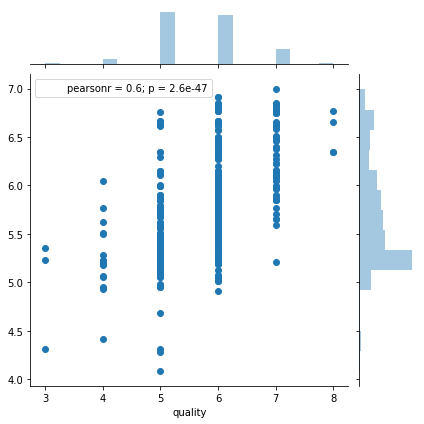

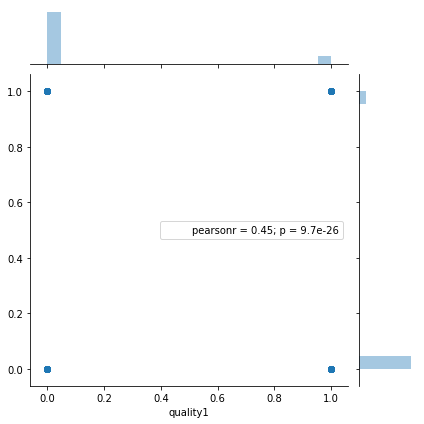

In [222]:
abc = AdaBoostClassifier(n_estimators=100)
abr = AdaBoostRegressor(n_estimators=100)
abc.fit(X_cat_train,Y_cat_train)
abr.fit(X_train,Y_train)
print('AdaBoostRegressor score with test data',abr.score(X_test,Y_test))
print('AdaBoostRegressor score with train data',abr.score(X_train,Y_train))
print('AdaBoostClassifier score with test data',abc.score(X_cat_test,Y_cat_test))
print('AdaBoostClassifier score with train data',abc.score(X_cat_train,Y_cat_train))
Y_abc_pred = abc.predict(X_cat_test)
Y_abr_pred = abr.predict(X_test)
sns.jointplot(Y_test,Y_abr_pred)
sns.jointplot(Y_cat_test,Y_abc_pred)

# Q13 - Apply Bagging Classifier Algorithm and print the accuracy.

BaggingRegressor score with test data 0.42543001631321364
BaggingRegressor score with train data 0.9224850283556632
BaggingClassifier score with test data 0.8958333333333334
BaggingClassifier score with train data 1.0


/Users/sesankaran/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/sesankaran/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/sesankaran/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/sesankaran/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


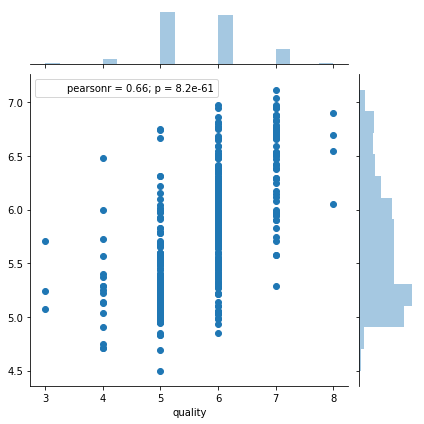

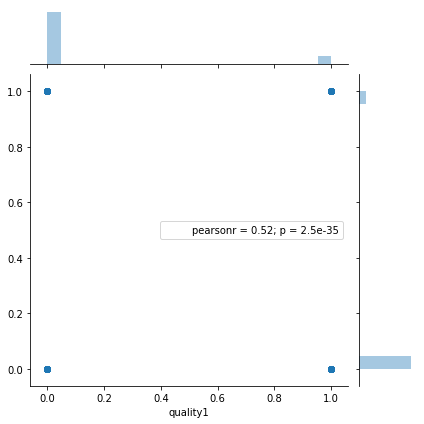

In [228]:
bc = BaggingClassifier(n_estimators=100)
br = BaggingRegressor(n_estimators=100)
bc.fit(X_cat_train,Y_cat_train)
br.fit(X_train,Y_train)
print('BaggingRegressor score with test data',br.score(X_test,Y_test))
print('BaggingRegressor score with train data',br.score(X_train,Y_train))
print('BaggingClassifier score with test data',bc.score(X_cat_test,Y_cat_test))
print('BaggingClassifier score with train data',bc.score(X_cat_train,Y_cat_train))
Y_bc_pred = bc.predict(X_cat_test)
Y_br_pred = br.predict(X_test)
sns.jointplot(Y_test,Y_br_pred)
sns.jointplot(Y_cat_test,Y_bc_pred)

# Q14 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

GradientBoostRegressor score with test data 0.375664969128914
GradientBoostRegressor score with train data 0.6626817293139622
GradientBoostClassifier score with test data 0.8979166666666667
GradientBoostClassifier score with train data 0.9722966934763181


/Users/sesankaran/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/sesankaran/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/sesankaran/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/sesankaran/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


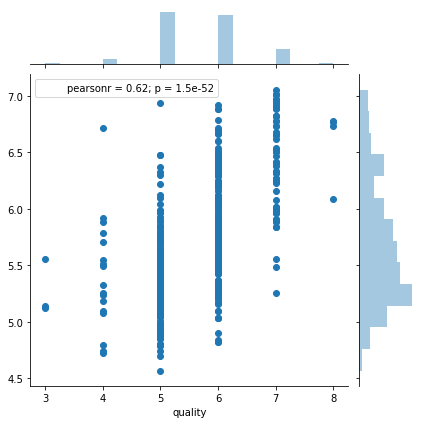

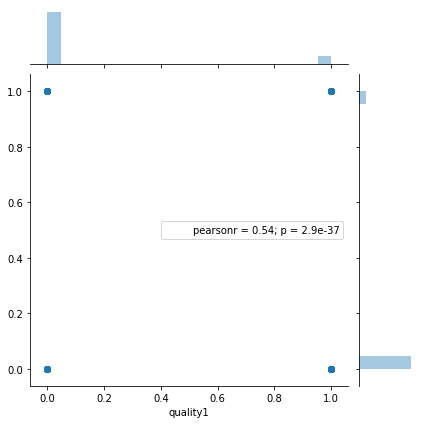

In [233]:
gbc = GradientBoostingClassifier(n_estimators=100)
gbr = GradientBoostingRegressor(n_estimators=100)
gbc.fit(X_cat_train,Y_cat_train)
gbr.fit(X_train,Y_train)
print('GradientBoostRegressor score with test data',gbr.score(X_test,Y_test))
print('GradientBoostRegressor score with train data',gbr.score(X_train,Y_train))
print('GradientBoostClassifier score with test data',gbc.score(X_cat_test,Y_cat_test))
print('GradientBoostClassifier score with train data',gbc.score(X_cat_train,Y_cat_train))
Y_gbc_pred = gbc.predict(X_cat_test)
Y_gbr_pred = gbr.predict(X_test)
sns.jointplot(Y_test,Y_gbr_pred)
sns.jointplot(Y_cat_test,Y_gbc_pred)

# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.

Voting Classifier score with test data 0.9041666666666667
Voting Classifier score with train data 0.9883824843610366


/Users/sesankaran/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/sesankaran/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


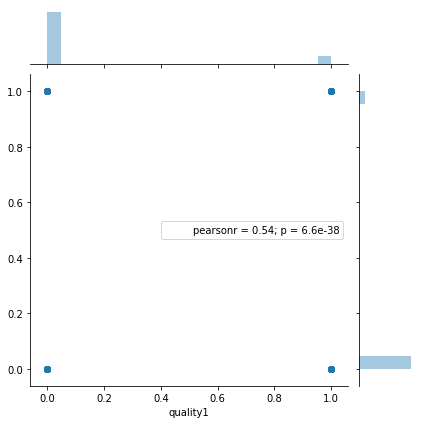

In [242]:
## Hard VotingClassifier
vc = VotingClassifier(estimators=[('dtc',dtc8),('rfc',rfc),('abc',abc),('bc',bc),('gbc',gbc)],voting='hard')
vc.fit(X_cat_train,Y_cat_train)
print('Voting Classifier score with test data',vc.score(X_cat_test,Y_cat_test))
print('Voting Classifier score with train data',vc.score(X_cat_train,Y_cat_train))
Y_vc_pred = vc.predict(X_cat_test)
sns.jointplot(Y_cat_test,Y_vc_pred)

Voting Classifier score with test data 0.8916666666666667
Voting Classifier score with train data 0.9874888293118856


/Users/sesankaran/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/sesankaran/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


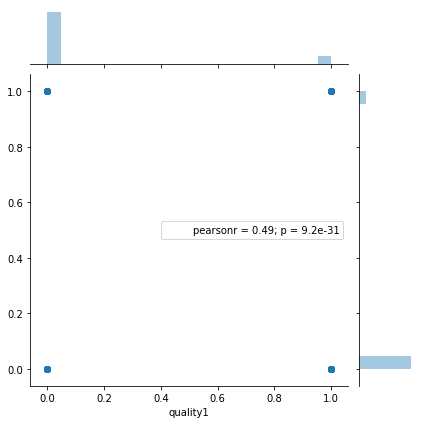

In [243]:
## Soft VotingClassifier
vc = VotingClassifier(estimators=[('dtc',dtc8),('rfc',rfc),('abc',abc),('bc',bc),('gbc',gbc)],voting='soft')
vc.fit(X_cat_train,Y_cat_train)
print('Voting Classifier score with test data',vc.score(X_cat_test,Y_cat_test))
print('Voting Classifier score with train data',vc.score(X_cat_train,Y_cat_train))
Y_vc_pred = vc.predict(X_cat_test)
sns.jointplot(Y_cat_test,Y_vc_pred)